# Kapittel 8

In [9]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

Text(0, 0.5, 'Relativ vekst [i prosent per år]')

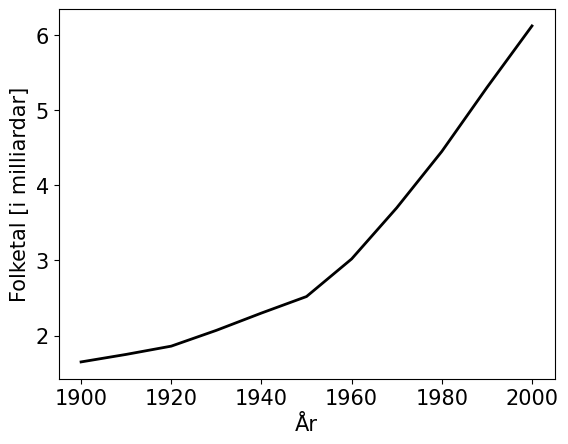

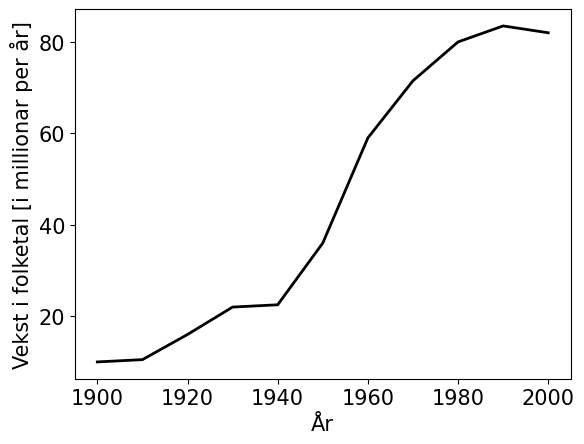

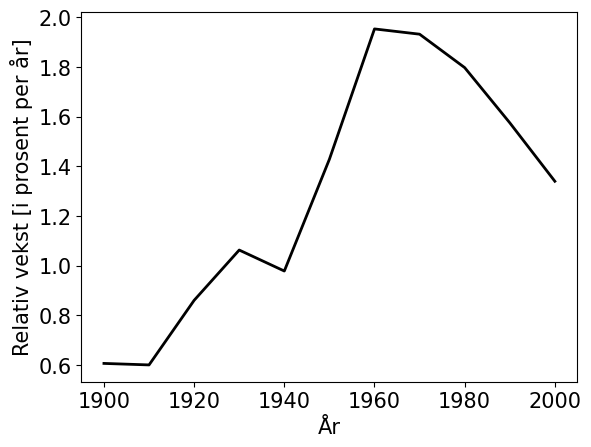

In [10]:
# Folkevekst.m

# Skript som lagar plott av folkeveksten på 1900-talet

# Gir vektorar med år og folketal (i milliardar):
h = 10
aar = range(1900, 2001, h)
folk = np.array([1.65, 1.75, 1.86, 2.07, 2.30, 2.52, 3.02, 3.70, 4.45, 5.30, 6.12])

# Plottar folketal
plt.figure(1)
plt.plot(aar, folk, 'k-', linewidth=2)
plt.rcParams.update({'font.size': 15})
plt.xlabel('År')
plt.ylabel('Folketal [i milliardar]')

# Reknar ut dei deriverte
# For år 1900
folkDeriv = np.empty((11))
folkDeriv[0] = (folk[1]-folk[0])/h
# For åra 1910-1990
for n in range(1, 10):
    folkDeriv[n] = (folk[n+1]-folk[n-1])/(2*h)
# For år 2000
folkDeriv[10] = (folk[10]-folk[9])/h

# Plottar vekstfarten
plt.figure(2)
# Reknar om til millionar/år
plt.plot(aar, folkDeriv*1e3, 'k-', linewidth=2)
plt.rcParams.update({'font.size': 15})
plt.xlabel('År')
plt.ylabel('Vekst i folketal [i millionar per år]')

# Plottar relativ vekstfart
plt.figure(3)
plt.plot(aar, folkDeriv/folk*100, 'k-', linewidth=2)
plt.rcParams.update({'font.size': 15})
plt.xlabel('År')
plt.ylabel('Relativ vekst [i prosent per år]')


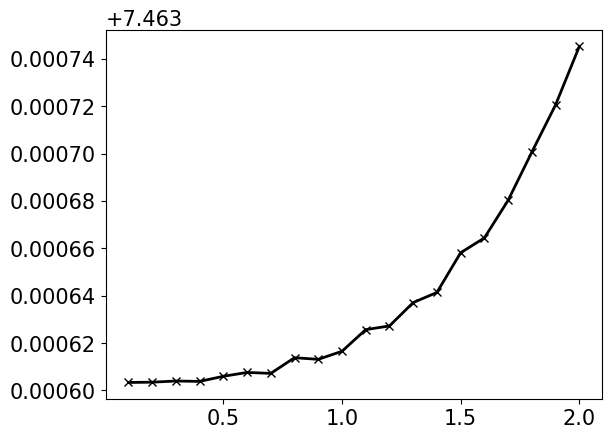

In [11]:
# GammaVsExp.m

# Skript som bestemmer skjæringspunktet mellom
# eksponentialfunksjonen og gammafunksjonen.
# Til det brukar vi Newtons metode og numerisk derivasjon.
# Skriptet plottar konvergensen av svaret mot h-verdien
# som blir brukt i derivasjonen.

# Gir presisjon og h-verdiane
pres = 1e-5
hVektor = np.arange(2, 0.0, -0.1)
# Startverdi
x0 = 8

indeks = 0
svar = np.empty_like(hVektor)
# Bestemmer x ved Newtons metode for kvar av h-verdiane
for h in hVektor:
    x = x0
    xGml = 10
    while abs(x-xGml) > pres:
        xGml = x
        # Den deriverte av gamma
        derivert = (gamma(x+h)-gamma(x-h))/(2*h)
        # Iterasjonsformel (Newtons metode)
        x = x-(gamma(x)-np.exp(x))/(derivert-np.exp(x))
    svar[indeks] = x
    indeks = indeks+1

# Plottar løysingane som funksjon av h
plt.plot(hVektor, svar, 'kx-', linewidth=2)


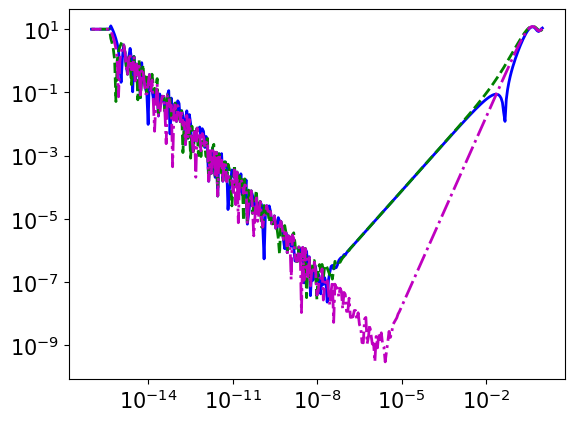

In [12]:
# PlottFeilenDeriv.m

# Skript som plottar feilen i ulike estimat for
# den deriverte.
# Plottet blir laga med logaritmiske aksar.


def f(x):
    """Funksjonen som skal deriverast"""
    return np.sin(x**2)
    
def f_d(x):
    """Den deriverte"""
    return 2*x*np.cos(x**2)

# Argument-verdi
a = 5

# Eksakt svar
derivert = f_d(a)

# Vektor med ulike steglengder
#h = 10**np.arange(0, -18, -1)    # Grov oppdeling
h = 0.9**np.arange(0, 351)        # Fin oppdeling

# Tre estimat: framover-, bakover- og midtpunktsformel
framFormel = abs((f(a+h)-f(a))/h-derivert)
bakFormel = abs((f(a)-f(a-h))/h-derivert)
midtFormel = abs((f(a+h)-f(a-h))/(2*h)-derivert)

# Plottar feilen med logaritmiske aksar
plt.loglog(h, framFormel, 'b-', linewidth=2)
plt.loglog(h, bakFormel, 'g--', linewidth=2)
plt.loglog(h, midtFormel, 'm-.', linewidth=2)
plt.rcParams.update({'font.size': 15})
#set(gcf,'paperpositionmode','auto')